In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns


In [3]:
train_df=pd.read_csv(r"C:\Users\DELL\Downloads\internship\twitter_training.csv")
train_df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
train_df.head

<bound method NDFrame.head of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just reali

In [5]:
validation_df = pd.read_csv(r"C:\Users\DELL\Downloads\internship\twitter_validation.csv")
validation_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
validation_df.head

<bound method NDFrame.head of      3364             Facebook  Irrelevant  \
0     352               Amazon     Neutral   
1    8312            Microsoft    Negative   
2    4371                CS-GO    Negative   
3    4433               Google     Neutral   
4    6273                 FIFA    Negative   
..    ...                  ...         ...   
994  4891  GrandTheftAuto(GTA)  Irrelevant   
995  4359                CS-GO  Irrelevant   
996  2652          Borderlands    Positive   
997  8069            Microsoft    Positive   
998  6960      johnson&johnson     Neutral   

    I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0    BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                  

In [7]:
missing_train = train_df.isnull().sum()
missing_validation = validation_df.isnull().sum()
duplicates_train = train_df.duplicated().sum()
duplicates_validation = validation_df.duplicated().sum()
missing_train,missing_validation,duplicates_train,duplicates_validation

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

In [8]:
#checking the distrubtion of swenitment labels
train_sentiment_distrubtion = train_df.iloc[:,2].value_counts()
validation_sentiment_distrubtion = validation_df.iloc[:,2].value_counts()

In [9]:
#checking the number of unique entities in the training set
unique_entities_train = train_df.iloc[:,2].nunique()
train_sentiment_distrubtion,validation_sentiment_distrubtion,unique_entities_train

(Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: Positive, dtype: int64,
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: Irrelevant, dtype: int64,
 4)

In [21]:
# Remove duplicate rows from the training set
train_df_cleaned = train_df.drop_duplicates()

# Drop rows with missing tweet/message values
train_df_cleaned = train_df_cleaned.dropna(subset=[train_df.columns[3]])

# Verify the cleaning
remaining_duplicates_train = train_df_cleaned.duplicated().sum()
remaining_missing_train = train_df_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(0,
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

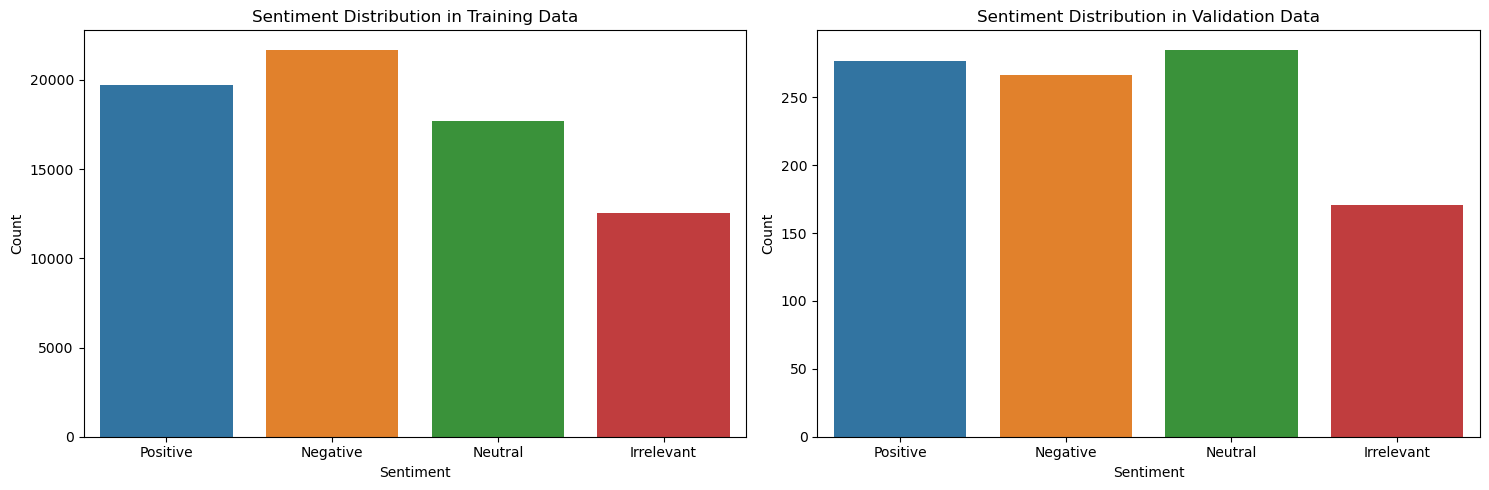

In [22]:

# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_df_cleaned, x=train_df_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=validation_df, x=validation_df.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()


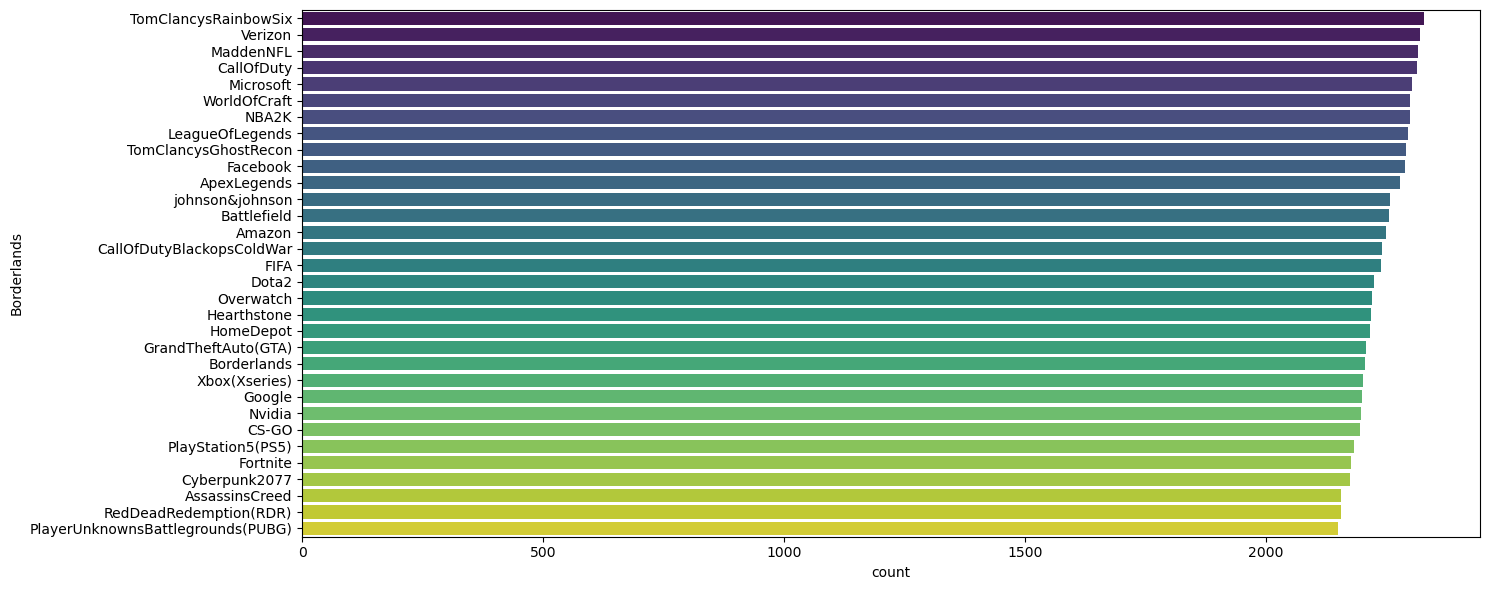

In [23]:
plt.figure(figsize=(15,6))
#plot entity distrubtion for training data
sns.countplot(data=train_df_cleaned, y=train_df_cleaned.columns[1], order=train_df_cleaned[train_df_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title=('Entity Distrubtion in Training Data')
plt.ylabel=('Count')
plt.xlabel=('Entity')
plt.tight_layout()
plt.show()

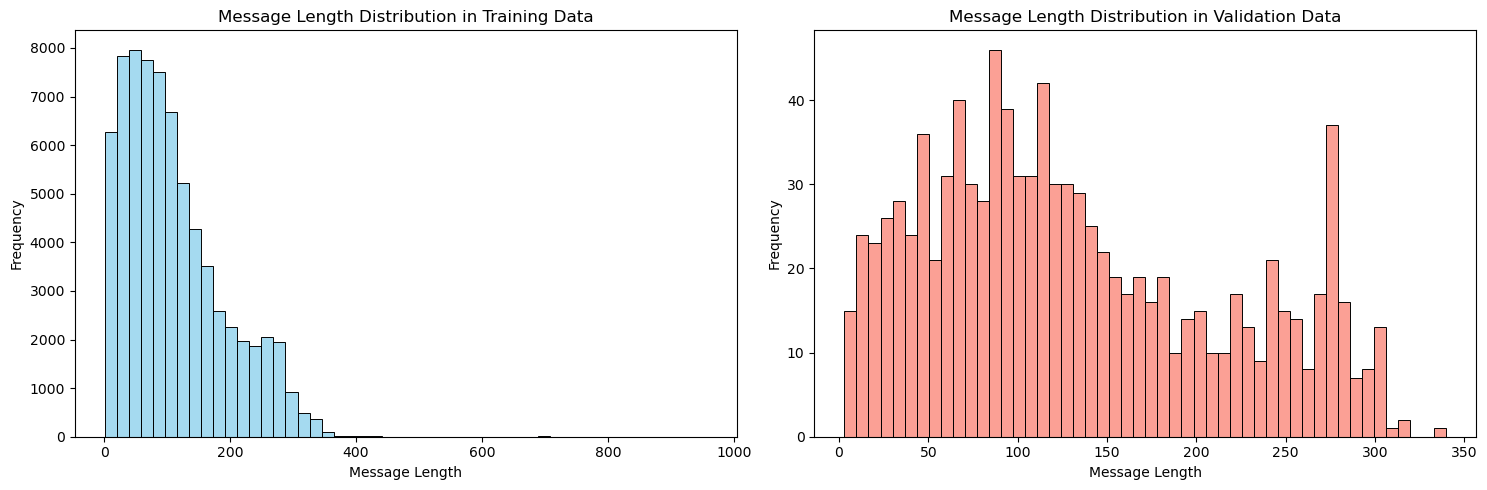

In [29]:
#calculate the length of each message
train_df_cleaned['message_cleaned']= train_df_cleaned[train_df_cleaned.columns[3]].apply(len)
validation_df['message_length']=validation_df[validation_df.columns[3]].apply(len)
#setup the plots
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(train_df_cleaned['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(validation_df['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()



TypeError: 'str' object is not callable

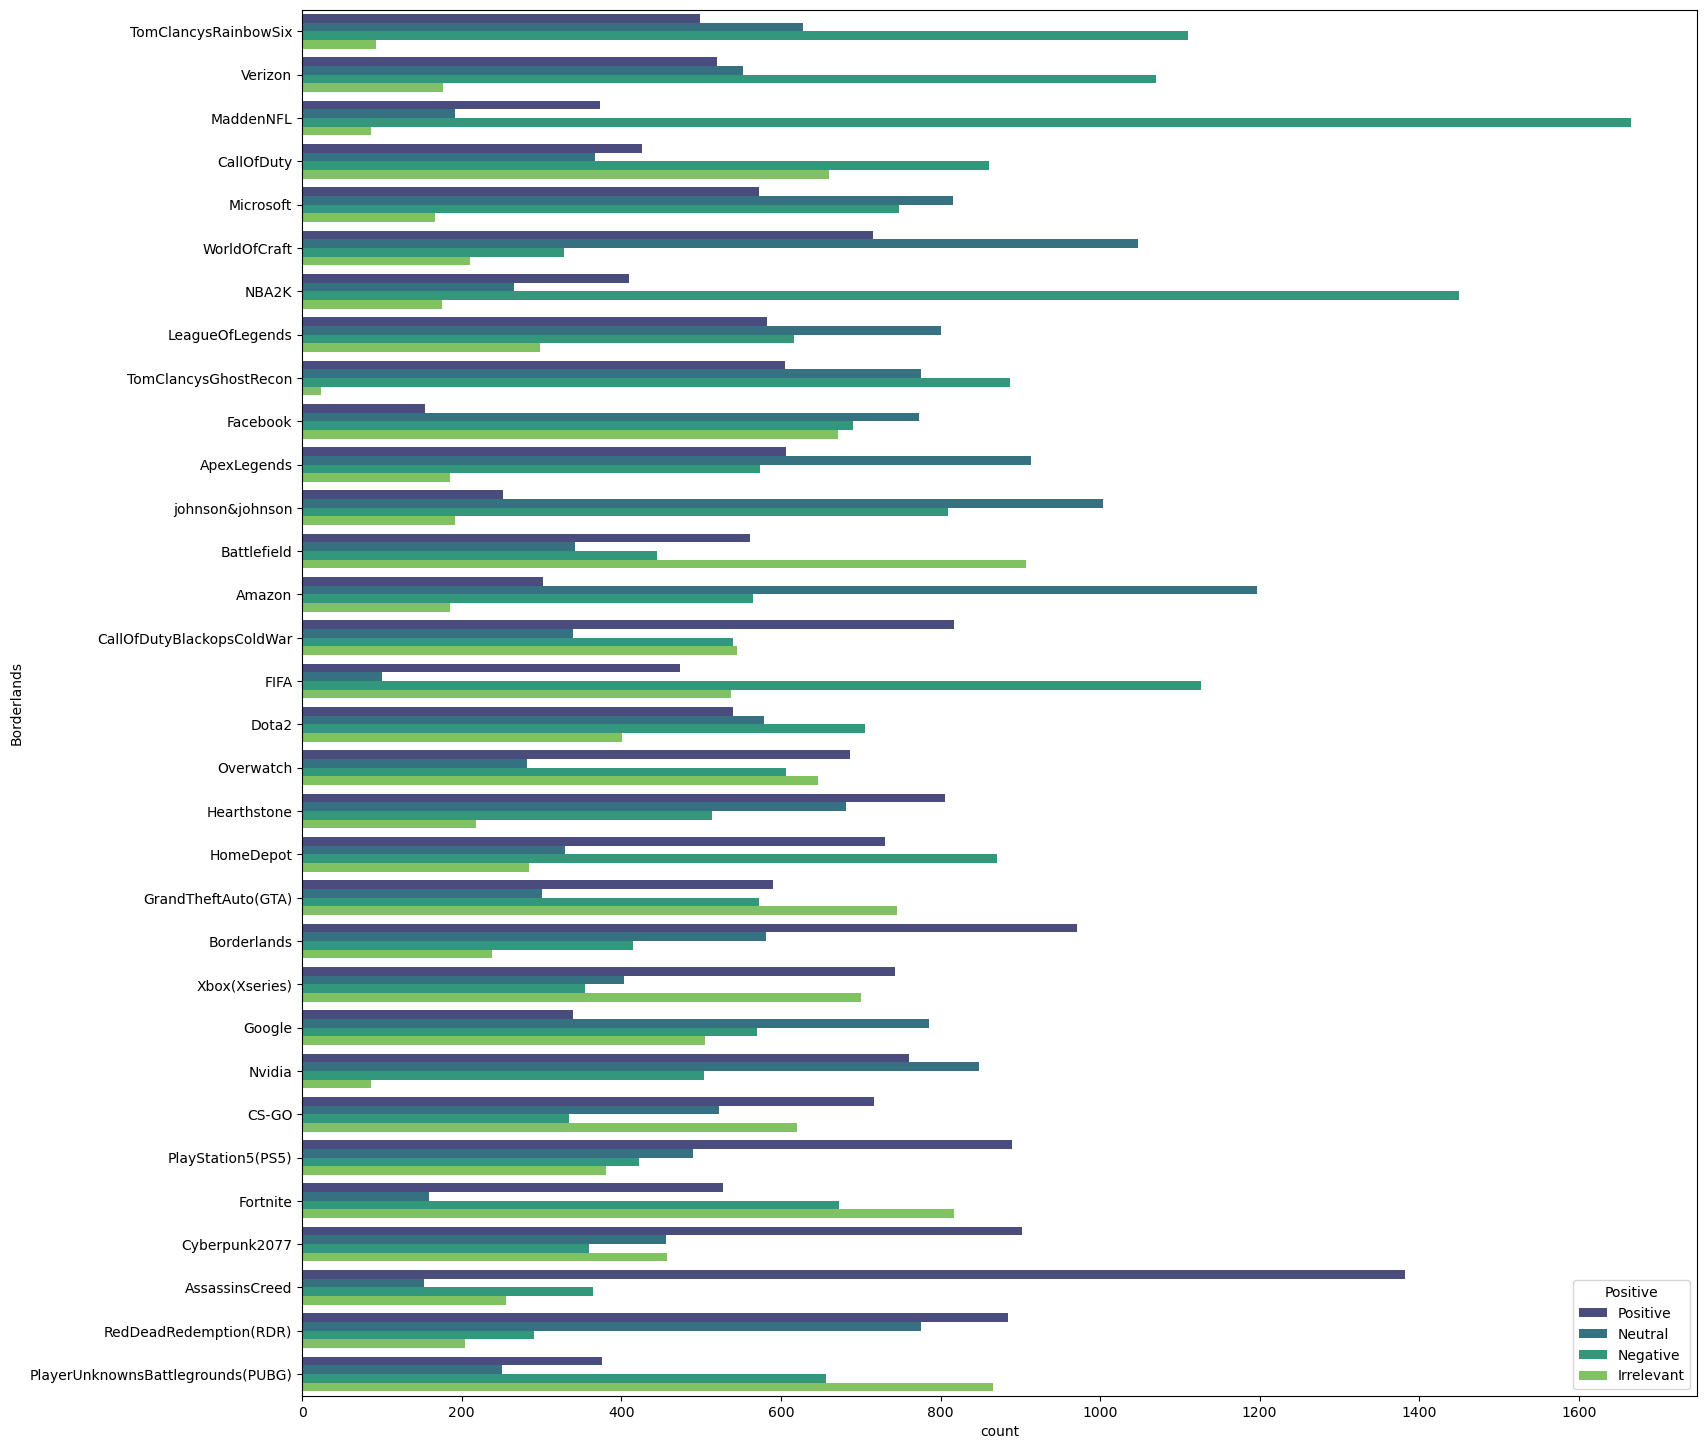

In [31]:
plt.figure(figsize=(18,18))
# Plot sentiment distribution by entity
sns.countplot(data=train_df_cleaned, y=train_df_cleaned.columns[1], hue=train_df_cleaned.columns[2], 
              order=train_df_cleaned[train_df_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')


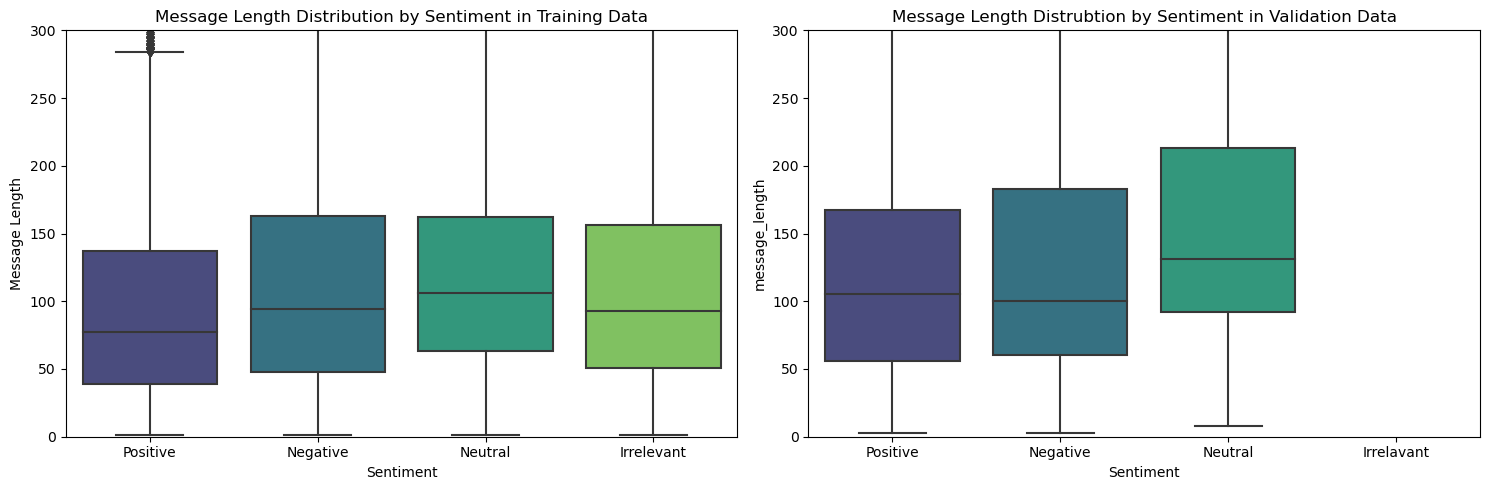

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=train_df_cleaned, x=train_df_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0,300) #limiting the x-axis for better visualizationf
sns.boxplot(data=validation_df,x=validation_df.columns[2],y='message_length',ax=ax[1],palette='viridis',order=['Positive' ,'Negative','Neutral','Irrelavant'])
ax[1].set_title('Message Length Distrubtion by Sentiment in Validation Data')
ax[1].set_xlabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0,300) #limiting the yaxis for better visualization
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

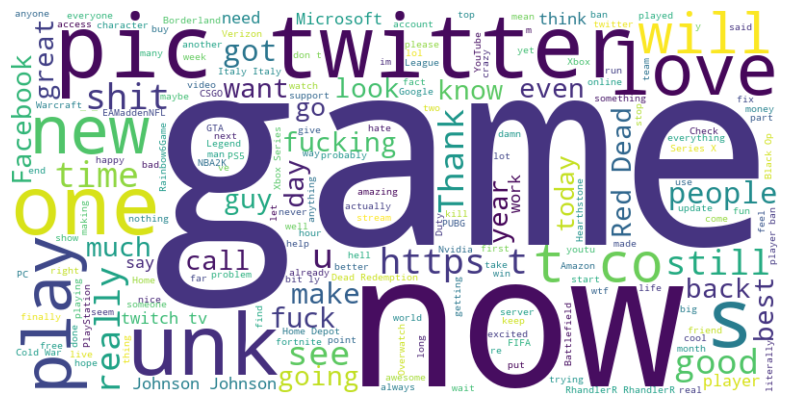

In [44]:
from wordcloud import WordCloud
all_text = " ".join(tweet for tweet in train_df_cleaned[train_df_cleaned.columns[3]])
wordcloud_all = WordCloud(background_color='white',width=800,height=400).generate(all_text)
#plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()
